Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE" and remove every line containing the expression: "raise ..." (if you leave such a line your code will not run).

## IMPORTANT: make sure to rerun all the code from the beginning to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebook!!!

Fill in your name and id number (numero matricola) below:

In [1]:
NAME = "Giulio Savian"
ID_number = int("1167313")

import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."

---

## HOMEWORK #3

### Non linear models for classification 

In this notebook we are going to explore the use of SVM and Neural Networks for image classification. We are going to use the famous MNIST dataset, that is a dataset of handwritten digits. We get the data from mldata.org, that is a public repository for machine learning data.

In [2]:
# Load the required packages
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

np.random.seed(ID_number)

In [3]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
## Load data from https://www.openml.org/d/554
X, Y = fetch_openml('mnist_784', version=1, return_X_y=True)

print(f'Each image is represented as vector of shape {X[0].shape}')
print(f'The image is represented in gray scale levels {X[0]}')
print(f'Here it is a label: {Y[0]}')

# Rescale the data
X = X / 255.

Each image is represented as vector of shape (784,)
The image is represented in gray scale levels [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.

In a classification problem it is desirable to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.
We can achieve this by setting the “stratify” argument of the function "train_test_split" to the Y component of our dataset.

We are going to use 500 samples in the train dataset, the remaining ones are used for testing.

In [4]:
from sklearn.model_selection import train_test_split

m_t = 500
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=m_t/len(Y), random_state=ID_number, stratify=Y)

print(f'Lenght train dataset: {len(y_train)}, Labels and frequencies: \n {list(zip(*np.unique(y_train, return_counts=True)))}')
print(f'Lenght test dataset: {len(y_test)}, Labels and frequencies: \n {list(zip(*np.unique(y_test, return_counts=True)))}')

Lenght train dataset: 500, Labels and frequencies: 
 [('0', 49), ('1', 56), ('2', 50), ('3', 51), ('4', 49), ('5', 45), ('6', 49), ('7', 52), ('8', 49), ('9', 50)]
Lenght test dataset: 69500, Labels and frequencies: 
 [('0', 6854), ('1', 7821), ('2', 6940), ('3', 7090), ('4', 6775), ('5', 6268), ('6', 6827), ('7', 7241), ('8', 6776), ('9', 6908)]


In [5]:
# Function to plot a digit and print the corresponding label
def plot_digit(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print(f"LABEL: {labels[index]}")
    return

INPUT:


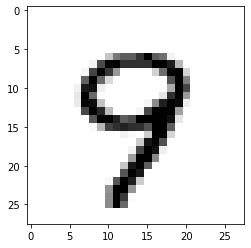

LABEL: 9
INPUT:


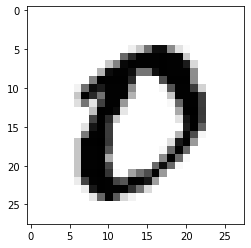

LABEL: 0


In [6]:
#let's try the plotting function
plot_digit(x_train, y_train, 100)
plot_digit(x_test, y_test, 40000)

## TO DO 1
SVM with cross validation to pick the best model. Use SVC from sklearn.svm and GridSearchCV from sklearn.model_selection (5-fold cross-validation).

Print the best parameters found as well as the best score obtained by the 'optimal' model.
Choose the grid, depending on the kernel you are using different hyper-parameters are needed (C, gamma, ...). 
You do not need to use more than 5 values for each hyper-parameter (otherwise the cell could be very slow). 

In [7]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV


def compute_best_SVM_with_CV(kernel_type : str, parameters : dict, x_train : np.ndarray, y_train : np.ndarray) -> tuple:
    '''
    Use Cross validation to find the best SVM on the given parameters. Return the best parameters set together with 
    the corresponding score. Return also the scores for all the other parameters given as input.
    :param kernel_type: Type of kernel (i.e. linear, rbf, poly)
    :param parameters: Dict containing kernel parameters (e.g. {'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001], ...})
    :param x_train: Train dataset
    :param y_train: Train labels
    
    :returns: (best_param, best_score, all_scores)
        WHERE:
        best_param: best parameter set (this is a dictionary)
        best_score: best score obtained for the given parameters (float)
        all_scores: all scores computed for each parameter (np.ndarray)
    '''
    SVM_model = SVC(kernel=kernel_type)
    # Use GridSearchCV to find the best parameter set.
    # YOUR CODE HERE
    clf = GridSearchCV(estimator = SVM_model, param_grid = parameters)
    clf.fit(x_train, y_train)

    print('#####################################')
    print(f'RESULTS for {kernel_type} KERNEL\n')
    # Store the best parameters set and print them
    print("Best parameters set found:")
    best_param = None
    # YOUR CODE HERE
    best_param = clf.best_params_
    print(best_param)
    
    # Store and print the score of the best parameters set
    print("\nScore with best parameters:")
    best_score = None
    # YOUR CODE HERE
    best_score = clf.best_score_
    print(best_score)
    
    # Store and print all the scores for the given parameters (average of the validation scores)
    print("\nAll scores on the grid:")
    all_scores = None
    # YOUR CODE HERE
    all_scores = clf.cv_results_['mean_test_score']
    print(all_scores)
    
    return best_param, best_score, all_scores

# Choose the grid for parameters of the linear SVM kernel
linear_parameters = None
# YOUR CODE HERE
linear_parameters = {'C': np.logspace(-3,1,5)}
best_param_lin, best_score_lin, all_scores_lin = compute_best_SVM_with_CV('linear', linear_parameters, x_train, y_train)
# Choose the grid for parameters of the rbf SVM kernel
rbf_parameters = None
# YOUR CODE HERE
rbf_parameters = {'C': np.logspace(-1,2,4) , 'gamma': np.logspace(-3,1,5)}
best_param_rbf, best_score_rbf, all_scores_rbf = compute_best_SVM_with_CV('rbf', rbf_parameters, x_train, y_train)
# Choose the grid for parameters of the poly SVM kernel (do not forget to choose the degree)
poly_parameters = None
# YOUR CODE HERE
poly_parameters = {'C':  np.logspace(-2,2,5), 'gamma':  np.logspace(-2,2,5),'degree':[1,2],'coef0': np.logspace(-1,3,5)}
best_param_poly, best_score_poly, all_scores_poly = compute_best_SVM_with_CV('poly', poly_parameters, x_train, y_train)

#####################################
RESULTS for linear KERNEL

Best parameters set found:
{'C': 0.1}

Score with best parameters:
0.8699999999999999

All scores on the grid:
[0.53  0.834 0.87  0.868 0.868]
#####################################
RESULTS for rbf KERNEL

Best parameters set found:
{'C': 10.0, 'gamma': 0.01}

Score with best parameters:
0.892

All scores on the grid:
[0.112 0.462 0.112 0.112 0.112 0.744 0.872 0.65  0.112 0.112 0.87  0.892
 0.672 0.112 0.112 0.872 0.892 0.672 0.112 0.112]
#####################################
RESULTS for poly KERNEL

Best parameters set found:
{'C': 0.01, 'coef0': 100.0, 'degree': 2, 'gamma': 1.0}

Score with best parameters:
0.882

All scores on the grid:
[0.112 0.53  0.834 0.87  0.868 0.112 0.822 0.868 0.868 0.868 0.112 0.53
 0.834 0.87  0.868 0.112 0.834 0.868 0.868 0.868 0.112 0.53  0.834 0.87
 0.868 0.772 0.876 0.87  0.868 0.868 0.112 0.53  0.834 0.87  0.868 0.866
 0.87  0.882 0.87  0.868 0.112 0.53  0.834 0.87  0.868 0.868 0.868 0.87

In [8]:
assert type(best_param_rbf) == dict
assert type(best_score_rbf) == np.float64
assert np.prod(np.array([len(params) for params in rbf_parameters.values()])) == len(all_scores_rbf)


In [9]:
# TODO 2: 
# Get training and test error for the best SVM model obtained from CV (you need to choose across different kernels 
# too). You just need to look at the best model for each kernel and choose the best one (you can do this by hand).

best_kernel_type, best_parameters = None, None
# YOUR CODE HERE
best_kernel_type, best_parameters = 'rbf', best_param_rbf
best_SVM = SVC(kernel=best_kernel_type, **best_parameters)
best_SVM.fit(x_train, y_train)

# Compute training and test error for this model (use the usual sklearn built-in functions)
training_error, test_error = None, None
# YOUR CODE HERE
training_error, test_error = 1. - best_SVM.score(x_train,y_train) , 1. - best_SVM.score(x_test,y_test)

print (f"Best SVM training error: {training_error}")
print (f"Best SVM test error: {test_error}")

Best SVM training error: 0.0
Best SVM test error: 0.10738129496402882


In [10]:
assert type(training_error) == np.float64
assert type(test_error) == np.float64


### TO DO 3
Now we use feed-forward neural networks for classification. You can use the Multi-Layer-Perceptron (the multi-layer structure we have seen in class, see http://scikit-learn.org/stable/modules/neural_networks_supervised.html).

Note that we fix the starting random state so to make the runs reproducible. Use max_iter=1000, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1. Pick few architectures and use the default activation function (ReLU).

In [11]:
# test different architectures: 
# - 1 hidden layer with 10 nodes, 
# - 1 hidden layer with 50 nodes, 
# - 2 hidden layer with 10 nodes each, 
# - 2 hidden layer with 50 nodes each
# feel free to change this and test more/different structures

parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}

mlp = MLPClassifier(max_iter=1000, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID_number, learning_rate_init=.1)

# Use GridSearchCV to find the best mlp using 5 fold CV.
mlp_CV = None
# YOUR CODE HERE
mlp_CV = GridSearchCV(mlp , parameters)
mlp_CV.fit(x_train, y_train)

print('#####################################')
print ('RESULTS FOR NN\n')
# Store the best parameters set and print them
print("Best parameters set found:")
mlp_best_param = None
# YOUR CODE HERE
mlp_best_param =  mlp_CV.best_params_
print(mlp_best_param)

# Store and print the score of the best parameters set
print("\nScore with best parameters:")
mlp_best_score = None
# YOUR CODE HERE
mlp_best_score = mlp_CV.best_score_
print(mlp_best_score)

# Store and print all the scores for the given parameters (average of the validation scores)
print("\nAll scores on the grid:")
mlp_all_scores = None
# YOUR CODE HERE
mlp_all_scores = mlp_CV.cv_results_['mean_test_score']
print(mlp_all_scores)

#####################################
RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (50, 50)}

Score with best parameters:
0.852

All scores on the grid:
[0.846 0.836 0.808 0.852]


In [12]:
assert type(mlp_best_param) == dict
assert type(mlp_best_score) == np.float64

## TO DO 4


Now get training and test error for a NN with best parameters from above. We use verbose=True
in input so to see how loss changes in iterations (see how this changes if the number of iterations is changed)

Iteration 1, loss = 2.29874635
Iteration 2, loss = 2.07448799
Iteration 3, loss = 1.77205786
Iteration 4, loss = 1.29704634
Iteration 5, loss = 0.91941197
Iteration 6, loss = 1.06004983
Iteration 7, loss = 0.54940014
Iteration 8, loss = 0.35246823
Iteration 9, loss = 0.25692333
Iteration 10, loss = 0.20067352
Iteration 11, loss = 0.15165356
Iteration 12, loss = 0.12218975
Iteration 13, loss = 0.08393228
Iteration 14, loss = 0.06409686
Iteration 15, loss = 0.04657292
Iteration 16, loss = 0.03451316
Iteration 17, loss = 0.02586452
Iteration 18, loss = 0.01912939
Iteration 19, loss = 0.01544640
Iteration 20, loss = 0.01202749
Iteration 21, loss = 0.01018212
Iteration 22, loss = 0.00888958
Iteration 23, loss = 0.00763537
Iteration 24, loss = 0.00687684
Iteration 25, loss = 0.00609276
Iteration 26, loss = 0.00555462
Iteration 27, loss = 0.00514089
Iteration 28, loss = 0.00474304
Iteration 29, loss = 0.00444867
Iteration 30, loss = 0.00418088
Iteration 31, loss = 0.00395916
Iteration 32, los

(Text(0.5, 0, 'Iter'), Text(0, 0.5, 'Loss'))

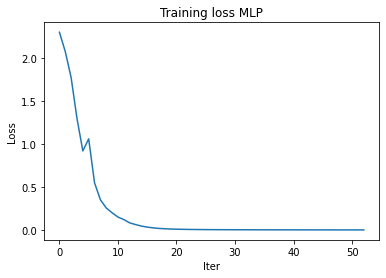

In [13]:
# Get training and test error for the best NN model from CV
max_iter = 1000
mlp = MLPClassifier(**mlp_best_param, max_iter=max_iter, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID_number,
                    learning_rate_init=.1, verbose=True)

# ADD CODE: FIT MODEL & COMPUTE TRAINING AND TEST ERRORS
training_error, test_error = None, None
# YOUR CODE HERE
mlp.fit(x_train, y_train)
training_error, test_error = 1 - mlp.score(x_train,y_train) , 1 - mlp.score(x_test,y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

plt.plot(mlp.loss_curve_, label='Training Loss')
plt.title('Training loss MLP')
plt.xlabel('Iter'), plt.ylabel('Loss')

In [14]:
assert type(training_error) == np.float64
assert type(test_error) == np.float64


## TO DO  5
Write a function to find and plot the first digit (in x_test) that is missclassified by NN and correctly classified by SVM.

Write a function to compute the confusion matrix for the predictions of a model (on testset). If you are not familiar with what a confusion matrix is, have a look at this link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html . You are not allowed to use sklearn to create the confusion matrix BUT you can compare your solution with the sklearn implementation to check you wrote it right (see assert checks). 

INPUT:


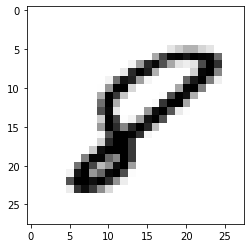

LABEL: 8
Label by NN: 6

SVM confusion matrix: [[6515    0   11   15    4  104  118    6   70   11]
 [   0 7582   55   20    6    6   12   11  104   25]
 [  76   97 6096   96   92   30  136  108  169   40]
 [  47   41  247 6119    5  193   58  127  211   42]
 [  37   52   15    4 6062    6  101   25   38  435]
 [  85  150   63  406  118 4814  291   63  171  107]
 [ 120   47   41    5   52   73 6448   11   26    4]
 [  33   96  106   17   66    1    4 6579   28  311]
 [  66  117   92  210   59  192   96   42 5719  183]
 [  56   48   16   95  141   35    3  334   77 6103]]
MLP confusion matrix: [[6299    0   48   25   10  110  137   46  144   35]
 [   1 7432   93   18    6    8    8   36  190   29]
 [ 151   44 5663   46  111   44  297  221  263  100]
 [ 115   22  300 5645   10  274   86  331  263   44]
 [  26   33   18   11 5774   20  178   15   64  636]
 [ 156   12  148  394  126 4453  277  126  463  113]
 [ 111   15  144    1   63  100 6312    3   35   43]
 [  42   67   66   37   64   

(Text(0.5, 1.0, 'SVM'), Text(0.5, 1.0, 'MLP'))

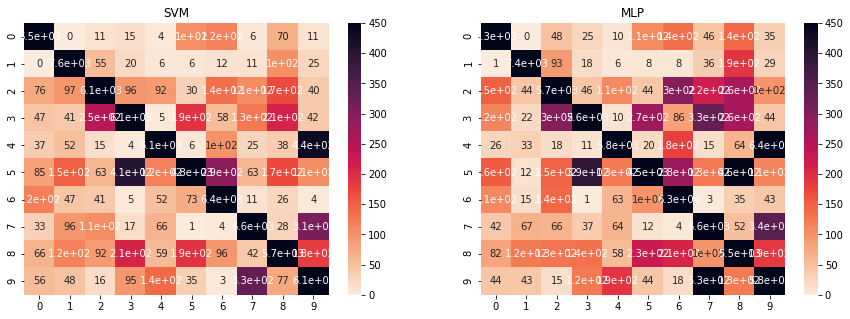

In [15]:
def find_and_print_first_mismatched_prediction(SVM_prediction : np.ndarray, NN_prediction : np.ndarray,
                                               x_test : np.ndarray, y_test : np.ndarray) -> int:
    '''
    Function to find and print the first digit that is missclassified by NN and correctly classified by SVM.
    :param SVM_prediction: SVM predicitons.
    :param NN_prediction: MLP predicitons.
    :param x_test: Test set inputs.
    :param y_test: Test set labels.
    
    :returns:
        i: returns the first index in which there is a mismatch between NN_prediction and true labels but no mismatch 
           between SVM_prediction and true labels. 
    '''
    i = 0
    found = False
    while ((not found) and (i<len(y_test))):
        # YOUR CODE HERE
        if SVM_prediction[i] == y_test[i] and NN_prediction[i] != y_test[i]:
          found = True
        else:
          i+=1
    
    plot_digit(x_test, y_test, i)
    print(f"Label by NN: {NN_prediction[i]}\n")
    return i
    
    
def confusion_matrix_by_hand(true_labels : np.ndarray, predicted_labels : np.ndarray) -> np.ndarray:
    '''
    Function used to compute the confusion matrix given true and predicted labels. 
    :param true_labels: True labels.
    :param predicted_labels: Predicted labels (note this function does not require to know which model generated 
                             the predictions).
    
    :returns:
        confusion_matrix: Confusion matrix for the given true and predicted labels.
    '''
    labels = np.unique(true_labels) 
    map_labels_to_index = {label:i for i, label in enumerate(labels)} 
    confusion_matrix = np.zeros((len(labels), len(labels)))
    # YOUR CODE HERE
    for i in range(len(labels)):
      for j in range(len(labels)):
        confusion_matrix[i][j]= np.sum((true_labels == labels[i]) & (predicted_labels == labels[j]))
    return confusion_matrix.astype(int)


# Let's test our functions
SVM_prediction = best_SVM.predict(x_test)
NN_prediction = mlp.predict(x_test)

first_index = find_and_print_first_mismatched_prediction(SVM_prediction, NN_prediction, x_test, y_test)

SVM_CM = confusion_matrix_by_hand(y_test, SVM_prediction)
MLP_CM = confusion_matrix_by_hand(y_test, NN_prediction)

print(f'SVM confusion matrix: {SVM_CM}')
print(f'MLP confusion matrix: {MLP_CM}')

# Convert confusion matrices to pandas data frames
labels = np.unique(y_test)
SVM_CM_df = pd.DataFrame(SVM_CM, index = labels, columns = labels)
MLP_CM_df = pd.DataFrame(MLP_CM, index = labels, columns = labels)

# Plot confusion matrices
fig, axes = plt.subplots(1,2, figsize=(15,5))
sn.heatmap(SVM_CM_df, annot=True, ax=axes[0], cmap='rocket_r', vmax=450)
sn.heatmap(MLP_CM_df, annot=True, ax=axes[1], cmap='rocket_r', vmax=450)
axes[0].set_title('SVM'), axes[1].set_title('MLP')

In [16]:
from sklearn.metrics import confusion_matrix

skl_confusion_matrix_SVM = confusion_matrix(y_test, SVM_prediction)
skl_confusion_matrix_NN = confusion_matrix(y_test, NN_prediction)

assert np.sum(skl_confusion_matrix_SVM - SVM_CM) == 0
assert np.sum(skl_confusion_matrix_NN - MLP_CM) == 0


## TO DO 6: explain the results you got (max 5 lines)
According to the cross-validation results, would you choose SVMs or NNs when 500 data points are available for training? Is this a good choice, given the results on the test set?

Looking at the confusion matrices what to do you observe? On which classes each model is more likely to make mistakes? 

(Answer in the next cell, no need to add code)

In [17]:
# YOUR CODE HERE
'''
This two method differ in the amount of information required to train the algorithm: SVMs require a number of observations to train not high. This is because they reliably identify the decision boundary on 
the basis of the sole support vectors. Therefore, SVM are good whit this quantity of data and by looking to the test error I can verify it (NN : 0.14499 > SVM : 0.10738). Besides, for NNs whit a small 
training dataset, it’s easier to find a hypothesis to fit the training data exactly i.e. overfitting (limited by cross-validation). The confusion matrices confirm the choise of SVM but in the other hand 
some mistakes remain in both type of model, moreover, if i make the sum of the mistakes on each class I can observe that there is a category on which both models are more likely to make an error and it's
the number five. I can specify by looking to the black region where this error occurs most and I can say that both SVM and MLP confuse the number 4 with the 9. The MLP also confuse the 9 with the 7.
'''

"\nThis two method differ in the amount of information required to train the algorithm: SVMs require a number of observations to train not high. This is because they reliably identify the decision boundary on \nthe basis of the sole support vectors. Therefore, SVM are good whit this quantity of data and by looking to the test error I can verify it (NN : 0.14499 > SVM : 0.10738). Besides, for NNs whit a small \ntraining dataset, it’s easier to find a hypothesis to fit the training data exactly i.e. overfitting. The confusion matrices confirm the choise of SVM but in the other hand some mistakes remain in both \ntype of model, moreover, if i make the sum of the mistakes on each class I can observe that there is a category on which both models are more likely to make an error and it's the number five. I can specify\nby looking to the black region where this error occurs and I can say that both SVM and MLP confuse the number 4 with the 9. The MLP also confuse the 9 with the 7.\n"

## More Data

Now let's do the same but using more data points for training SVM and NN. For SVM we are going to use the best hyperparameters set (kernel, C, gamma, ...) found using 500 data points. For NNs we use the same best architecture as before, but you can try more if you want! 

In [18]:
#let restart the random generator with the given seed
np.random.seed(ID_number)

m_t = 60000
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=m_t/len(Y), random_state=ID_number, stratify=Y)

print(f'Lenght train dataset: {len(y_train)}, Labels and frequencies: \n {list(zip(*np.unique(y_train, return_counts=True)))}')
print(f'Lenght test dataset: {len(y_test)}, Labels and frequencies: \n {list(zip(*np.unique(y_test, return_counts=True)))}')

Lenght train dataset: 60000, Labels and frequencies: 
 [('0', 5917), ('1', 6752), ('2', 5991), ('3', 6121), ('4', 5849), ('5', 5411), ('6', 5894), ('7', 6251), ('8', 5850), ('9', 5964)]
Lenght test dataset: 10000, Labels and frequencies: 
 [('0', 986), ('1', 1125), ('2', 999), ('3', 1020), ('4', 975), ('5', 902), ('6', 982), ('7', 1042), ('8', 975), ('9', 994)]


In [19]:
# As we did with the first HW let's use a decorator to measure time 
from collections import defaultdict
running_times = defaultdict(list)

def measure_time(function):
    def wrap(*args, **kw):
        import time 
        t_start = time.time()
        result = function(*args, **kw)
        t_end = time.time()
        running_times[type(args[0]).__name__].append(t_end - t_start)
        return result
    return wrap

@measure_time
def fit_classification_model(model, x_train, y_train):
    model.fit(x_train, y_train)

In [20]:
n_data = [250, 500, 1000, 2000, 5000, 7500]
svm_train_err, svm_test_err = [], [] 
mlp_train_err, mlp_test_err = [], [] 
for n in n_data: 
    print(f'Processing with {n} data ...')
    # Initialize models according to the best we got using 500 data
    svm = SVC(kernel=best_kernel_type, **best_parameters)
    mlp = MLPClassifier(**mlp_best_param, max_iter=max_iter, alpha=1e-4, solver='sgd', tol=1e-4, 
                        random_state=ID_number, learning_rate_init=.1)
    
    # fit svc
    fit_classification_model(svm, x_train[:n], y_train[:n])
    # get svc train and test error
    svm_train_err.append(1. - svm.score(x_train[:n], y_train[:n]))
    svm_test_err.append(1. - svm.score(x_test, y_test))
    
    # fit mlp
    fit_classification_model(mlp, x_train[:n], y_train[:n])
    # get mlp train and test error
    mlp_train_err.append(1. - mlp.score(x_train[:n], y_train[:n]))
    mlp_test_err.append(1. - mlp.score(x_test, y_test))

Processing with 250 data ...
Processing with 500 data ...
Processing with 1000 data ...
Processing with 2000 data ...
Processing with 5000 data ...
Processing with 7500 data ...


(<matplotlib.legend.Legend at 0x7fafd9729ac8>, Text(0.5, 1.0, 'Training Time'))

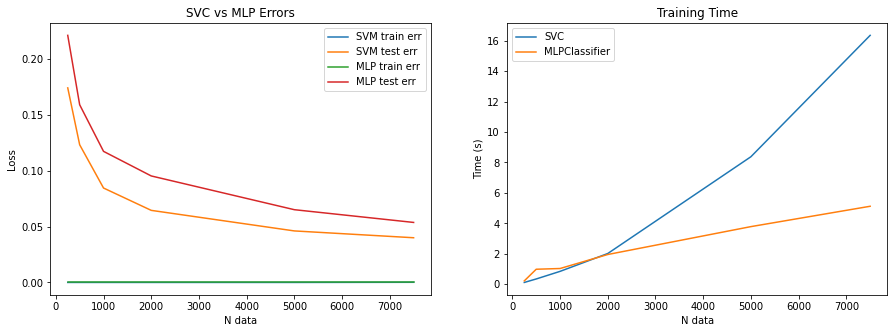

In [21]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))
axes[0].plot(n_data, np.array(svm_train_err), label='SVM train err')
axes[0].plot(n_data, np.array(svm_test_err), label='SVM test err')
axes[0].plot(n_data, np.array(mlp_train_err), label='MLP train err')
axes[0].plot(n_data, np.array(mlp_test_err), label='MLP test err')
axes[0].set_xlabel('N data'), axes[0].set_ylabel('Loss')
axes[0].legend(), axes[0].set_title('SVC vs MLP Errors')

for model, times in running_times.items():
    axes[1].plot(n_data, times, label=model)
axes[1].set_xlabel('N data'), axes[1].set_ylabel('Time (s)')
axes[1].legend(), axes[1].set_title('Training Time')

# TODO 7: Complete dataset
Just for comparison, since it may not be possible to learn a SVM on too many data (due to time and memory complexity issues, see previous plots), let's use logistic regression (with standard parameters from scikit-learn but the number of iteration).

In [22]:
from sklearn import linear_model

# Fit and test a logistic regression model
max_iter = 1000
log_reg = None
training_error, test_error = None, None
# YOUR CODE HERE
log_reg = linear_model.LogisticRegression(max_iter = max_iter)
log_reg.fit(x_train , y_train)
training_error_lr = 1 - log_reg.score(x_train , y_train)
test_error_lr = 1 - log_reg.score(x_test , y_test)

print (f"Best logistic regression training error: {training_error_lr:.4f}")
print (f"Best logistic regression test error: {test_error_lr:.4f}")

Best logistic regression training error: 0.0610
Best logistic regression test error: 0.0794


We now learn the NN. Below we use the same best architecture as before (found with 500 data), feel free to try larger ones (and to use again CV), or smaller ones if it takes too much time. (We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration). 

*Note*: If you do again CV to choose the best architecture remember to save the best set of parameters into the variable: "mlp_best_param".

In [23]:
#get training and test error for the best NN model from CV
best_mlp_large = None
training_error, test_error = None, None
# YOUR CODE HERE
best_mlp_large = MLPClassifier(**mlp_best_param, max_iter=max_iter, alpha=1e-4, solver='sgd', tol=1e-4,
                        random_state=ID_number, learning_rate_init=.1, verbose=True)
best_mlp_large.fit(x_train, y_train)
training_error, test_error = 1 - best_mlp_large.score(x_train,y_train) , 1 - best_mlp_large.score(x_test,y_test)

print ('\nRESULTS FOR BEST NN\n')

print (f"Best NN training error: {training_error:.4f}")
print (f"Best NN test error: {test_error:.4f}")

Iteration 1, loss = 0.33534278
Iteration 2, loss = 0.13537344
Iteration 3, loss = 0.10467406
Iteration 4, loss = 0.08730991
Iteration 5, loss = 0.07282980
Iteration 6, loss = 0.06498690
Iteration 7, loss = 0.05623035
Iteration 8, loss = 0.05077804
Iteration 9, loss = 0.04618508
Iteration 10, loss = 0.04202419
Iteration 11, loss = 0.03796529
Iteration 12, loss = 0.03528295
Iteration 13, loss = 0.03117207
Iteration 14, loss = 0.03073658
Iteration 15, loss = 0.02623975
Iteration 16, loss = 0.02613273
Iteration 17, loss = 0.02896457
Iteration 18, loss = 0.02407204
Iteration 19, loss = 0.02096069
Iteration 20, loss = 0.02189310
Iteration 21, loss = 0.02237331
Iteration 22, loss = 0.02223752
Iteration 23, loss = 0.02241093
Iteration 24, loss = 0.02004459
Iteration 25, loss = 0.02143227
Iteration 26, loss = 0.01803661
Iteration 27, loss = 0.01709308
Iteration 28, loss = 0.01654846
Iteration 29, loss = 0.01786712
Iteration 30, loss = 0.01829428
Iteration 31, loss = 0.01475834
Iteration 32, los

In [24]:
assert type(training_error) == np.float64
assert type(test_error) == np.float64


(Text(0.5, 1.0, 'MLP Train'), Text(0.5, 1.0, 'MLP Test'))

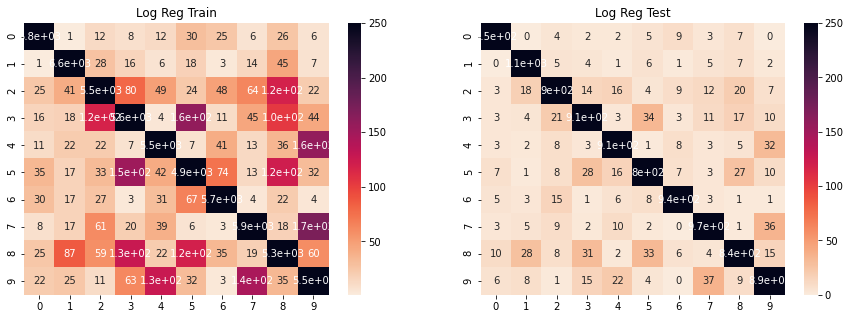

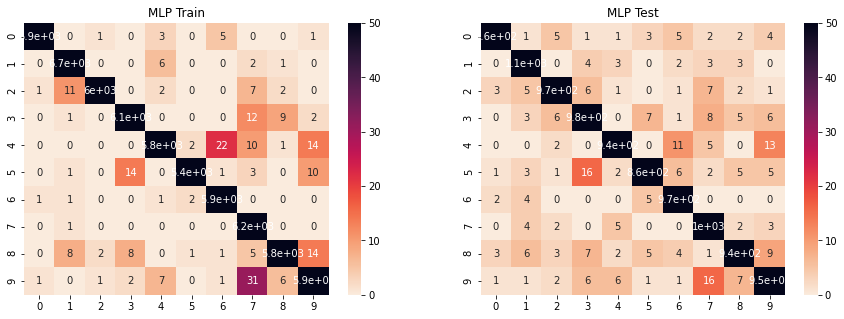

In [25]:
## TODO 8: compute the confusion matrices both on train and test set for Logistic regression (trained on 60k)
# and MLP (trained on 60k).

# Log Reg Confusion matrices
log_reg_CM_train, log_reg_CM_test = None, None
# YOUR CODE HERE
log_reg_CM_train = sklearn.metrics.confusion_matrix(y_train, log_reg.predict(x_train))#confusion_matrix_by_hand(y_train, log_reg.predict(x_train))
log_reg_CM_test = sklearn.metrics.confusion_matrix(y_test, log_reg.predict(x_test))#confusion_matrix_by_hand(y_test, log_reg.predict(x_test))

# mlp
mlp_CM_train, mlp_CM_test = None, None
# YOUR CODE HERE
mlp_CM_train = confusion_matrix_by_hand(y_train, best_mlp_large.predict(x_train))
mlp_CM_test = confusion_matrix_by_hand(y_test, best_mlp_large.predict(x_test))

# Convert confusion matrices to pandas data frames
labels = np.unique(y_test)
log_reg_CM_train_df = pd.DataFrame(log_reg_CM_train, index = labels, columns = labels)
log_reg_CM_test_df = pd.DataFrame(log_reg_CM_test, index = labels, columns = labels)

mlp_CM_train_df = pd.DataFrame(mlp_CM_train, index = labels, columns = labels)
mlp_CM_test_df = pd.DataFrame(mlp_CM_test, index = labels, columns = labels)

# Plot confusion matrices
fig, axes = plt.subplots(1,2, figsize=(15,5))
sn.heatmap(log_reg_CM_train_df, annot=True, ax=axes[0], cmap='rocket_r', vmax=250)
sn.heatmap(log_reg_CM_test_df, annot=True, ax=axes[1], cmap='rocket_r', vmax=250)
axes[0].set_title('Log Reg Train'), axes[1].set_title('Log Reg Test')

fig, axes = plt.subplots(1,2, figsize=(15,5))
sn.heatmap(mlp_CM_train_df, annot=True, ax=axes[0], cmap='rocket_r', vmax=50)
sn.heatmap(mlp_CM_test_df, annot=True, ax=axes[1], cmap='rocket_r', vmax=50)
axes[0].set_title('MLP Train'), axes[1].set_title('MLP Test')

In [26]:
assert log_reg_CM_train.shape == (10, 10)
assert log_reg_CM_test.shape == (10, 10)
assert mlp_CM_train.shape == (10, 10)
assert mlp_CM_test.shape == (10, 10)


## TO DO 9
Compare and discuss:
- compare the computational time required to fit a SVM and a MLP. Which is faster as the number of data increase? Why? Can you apply both methods in the high data regime?
- the results from SVM m=7500 and NN with m=60000 training data points.
- the results from NN with m=500 and m=60000 training data points.
- What do you observe in the confusion matrices? Which are the hardest classes? Are the hardest and easiest classes the same both for mlp and logistic regression?

(Answer in the next cell, no need to write code)

In [27]:
# YOUR CODE HERE
'''
1:
SVMs training requires solving the associated Lagrangian dual problem. This is a quadratic optimization problem in which the number of variables is very large. So, training time is proportional to the 
square of number of samples, while for NNs the training time is linear. Then, like my expectation the Neural Network is more fast than SVM as the number of data increase. Therefore, with high data regime
the SVMs take too much time and as a consequence we have used Logistic Regression.

2:
In general, with the same quantity of data the test error of the SVM is less than the NN but still the problem of time that doesn't grow quadratically in the NN, so in this last model I can increase the
number of samples and have a better test error with respect to the error of SVN with m=7500 (i.e. SVM test error: 0.05 > NN test error: 0.0281).

3:
In NN with m=60000 the result are better, the error is lower of an order of magnitude with respect to NN with m=500 (m=500: 0.144993 , m=60k:  0.0281). Moreover, with more samples, I decrease the 
possibility of overfitting that is also limited by croos-validation. 

4:
The confusion matrices and the train/test error tell us that surely the results are betten than before, in particolar the NN have better result than the LogisticRegression (use linear decision boundary). 
In general, the classies that was correctly classified before remain good now and the same for the 'bad classes'. If i consider the sum for counting the mistakes on each class, in the Logisticregression, 
the hardest class is the 8 followed by 2,3,5 and 9, while for MLP the number 5 and 9 have the same quantity of errors. Therefore, I can say that some similitudes are present and by looking to the 'easiest
classes' I can conferm this fact beacause is the same for both, i.e. 1. 
'''

"\nSVMs training requires solving the associated Lagrangian dual problem. This is a quadratic optimization problem in which the number of variables is very large. So, training time is proportional to the \nsquare of number of samples, while for NNs the training time is linear. Then, like my expectation the Neural Network is more fast than SVM as the number of data increase. Therefore, with high data regime\nthe SVMs take too much time and as a consequence we have used Logistic Regression.\n\nIn general, with the same quantity of data the test error of the SVM is less than the NN but still the problem of time that doesn't grow quadratically in the NN, so in this last model I can increase the number of samples and\nhave a better test error with respect to the error of SVN with m=7500.\n\nIn NN with m=60000 the result are better, the error is lower of an order of magnitude with respect to NN with m=500. Moreover, with more samples I decrease the possibility of overfitting that is also \nl